# Case 3: Dansk Industri
*Anders Reinholt Sindberg (dks656) & Albert Neve Alsbjerg (kmp116)*


## Indholdsfortegnelse
- Indledning
- Klargøring og import
- Delanalyse 1
- Delanalyse 2
- Delanalyse 3

## Indledning
`skriver vi senere...`


## Klargøring og import
Til databehandklingen vil følgende biblioteker blive brugt
- **pandas** til at strukturere vores data
- **numpy** til [...]
- **matplotlib** til at plotte data
- **seaborn** ligelides til at plotte data
- **afinn** til [...]

De vil nu blive importeret:

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from afinn import Afinn

## Delanalyse 1
Først importeres bilag 5:

In [26]:
#bilaget importeres, ID sættes som indeks for datasættet. Dertil tilføjes datatyper til kolonnerne
bilag5 = pd.read_excel("bilag_5.xlsx", index_col=0, \
                       dtype={'ID': int, \
                              'DI antal ansatte opgivet':int})
#inspiceres
bilag5

,Virk postnr,Virk postdistrikt,Medlemsstatus,Medlemstype,DI antal ansatte opgivet,Branche kode,Virk region,Virk land,DI Byg,DI Energi,...,Bilbranchen,Træ- og Møbelindustrien,ATL - Transportens Arbejdsgivere,Mejeribrugets Arbejdsgiverforening,DI Dansk Byggeri,Brug,DI indmeldelsesdato,Har besvaret MTU2020,Unnamed: 25,Har besvaret NPM2020
ID,,,,,,,,,,,,,,,,,,,,,
1,2300,København S,HOF,MEDLEM,7386,53.10.00,Region Hovedstaden,Danmark,0,0,...,0,0,0,0,0,Meget brug,2004-10-01,Ja,6,Nej
2,8260,Viby J,HOF,MEDLEM,7232,10.51.00,Region Midtjylland,Danmark,0,0,...,0,0,0,1,0,Meget brug,2012-07-01,Nej,Ikke besvaret,Nej
3,2860,Søborg,HOF,MEDLEM,5917,81.21.00,Region Hovedstaden,Danmark,0,0,...,0,0,0,0,0,Meget brug,2005-07-01,Ja,7,Nej
4,7330,Brande,HOF,MEDLEM,5701,28.11.10,Region Midtjylland,Danmark,0,1,...,0,0,0,0,0,Meget brug,2014-01-01,Ja,9,Nej
5,8960,Randers SØ,HOF,MEDLEM,5373,10.11.10,Region Midtjylland,Danmark,0,0,...,0,0,0,0,0,Meget brug,2002-07-01,Nej,Ikke besvaret,Nej
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12577,2791,Dragør,HOF,MEDLEM,36,81.30.00,Region Midtjylland,Danmark,0,0,...,0,0,0,0,1,Lidt brug,2020-09-01,Nej,Ikke besvaret,NaN
12578,2600,Glostrup,HOF,MEDLEM,36,43.12.00,Region Sjælland,Danmark,0,0,...,0,0,0,0,1,Lidt brug,2020-09-01,Nej,Ikke besvaret,NaN
12579,8830,Tjele,HOF,MEDLEM,36,43.32.00,Region Sjælland,Danmark,0,0,...,0,0,0,0,1,Lidt brug,2020-09-01,Nej,Ikke besvaret,NaN


### Segmentering
Vi vælger at segmentere medlemmerne i følgende 2 dimensioner:
- Antal ansatte
- Branche(?)

#### Segmentering af antal ansatte
Vi vælger at inddele medlemmerne i følgende segmenter:
Vi inddeler efter størrelse ud fra bilag 6: 
- 0-4=mikro
- 5-20= små
- 21-100 mellemstore
- 101-499 store
- meget stor < 499 

Pba. særlig relationsordning for medlemmer med minimum 500 ansatte sorteres disse for sig. 

In [39]:
# simpel funktion, der inddeler virksomheden i størrelses kategori
def categorize_size(row):
    size = row["DI antal ansatte opgivet"]
    if size < 5:
        return "0:mikro"
    if size < 21:
        return "1:lille"
    if size < 101:
        return "2:mellemstor"
    if size < 500:
        return "3:stor"
    if size > 499:
        return "4:meget stor"
    else:
        return np.nan

# funktionen køres på hvert medlem, og inddelingen gemmes i ny kolonne med navnet "størrelse"
bilag5["størrelse"] = bilag5.apply(categorize_size, axis=1)
bilag5

,Virk postnr,Virk postdistrikt,Medlemsstatus,Medlemstype,DI antal ansatte opgivet,Branche kode,Virk region,Virk land,DI Byg,DI Energi,...,ATL - Transportens Arbejdsgivere,Mejeribrugets Arbejdsgiverforening,DI Dansk Byggeri,Brug,DI indmeldelsesdato,Har besvaret MTU2020,Unnamed: 25,Har besvaret NPM2020,point,størrelse
ID,,,,,,,,,,,,,,,,,,,,,
1,2300,København S,HOF,MEDLEM,7386,53.10.00,Region Hovedstaden,Danmark,0,0,...,0,0,0,Meget brug,2004-10-01,Ja,6,Nej,1,4:meget stor
2,8260,Viby J,HOF,MEDLEM,7232,10.51.00,Region Midtjylland,Danmark,0,0,...,0,1,0,Meget brug,2012-07-01,Nej,Ikke besvaret,Nej,0,4:meget stor
3,2860,Søborg,HOF,MEDLEM,5917,81.21.00,Region Hovedstaden,Danmark,0,0,...,0,0,0,Meget brug,2005-07-01,Ja,7,Nej,1,4:meget stor
4,7330,Brande,HOF,MEDLEM,5701,28.11.10,Region Midtjylland,Danmark,0,1,...,0,0,0,Meget brug,2014-01-01,Ja,9,Nej,1,4:meget stor
5,8960,Randers SØ,HOF,MEDLEM,5373,10.11.10,Region Midtjylland,Danmark,0,0,...,0,0,0,Meget brug,2002-07-01,Nej,Ikke besvaret,Nej,0,4:meget stor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12577,2791,Dragør,HOF,MEDLEM,36,81.30.00,Region Midtjylland,Danmark,0,0,...,0,0,1,Lidt brug,2020-09-01,Nej,Ikke besvaret,NaN,0,2:mellemstor
12578,2600,Glostrup,HOF,MEDLEM,36,43.12.00,Region Sjælland,Danmark,0,0,...,0,0,1,Lidt brug,2020-09-01,Nej,Ikke besvaret,NaN,0,2:mellemstor
12579,8830,Tjele,HOF,MEDLEM,36,43.32.00,Region Sjælland,Danmark,0,0,...,0,0,1,Lidt brug,2020-09-01,Nej,Ikke besvaret,NaN,0,2:mellemstor


### Hvor mange af målingerne har medlemmerne besvaret?
Det måler vi ved at konstruere et simpelt indeks fra 0-2 med antallet af målinger det eneklte medlem har deltaget i. 

In [27]:
# simpel funktion, der retunerer antallet af målinger medlemmet har deltaget i
def number_participated(row):
    result = 0
    if row["Har besvaret MTU2020"] == "Ja":
        result += 1
    if row["Har besvaret NPM2020"] == "Ja":
        result += 1
    return result
    
# funktionen køres på hvert medlem, og scoren gemmes i en ny kolonne med navnet "point"
bilag5["point"] = bilag5.apply(number_participated, axis=1)
bilag5.head(50)

,Virk postnr,Virk postdistrikt,Medlemsstatus,Medlemstype,DI antal ansatte opgivet,Branche kode,Virk region,Virk land,DI Byg,DI Energi,...,Træ- og Møbelindustrien,ATL - Transportens Arbejdsgivere,Mejeribrugets Arbejdsgiverforening,DI Dansk Byggeri,Brug,DI indmeldelsesdato,Har besvaret MTU2020,Unnamed: 25,Har besvaret NPM2020,point
ID,,,,,,,,,,,,,,,,,,,,,
1,2300,København S,HOF,MEDLEM,7386,53.10.00,Region Hovedstaden,Danmark,0,0,...,0,0,0,0,Meget brug,2004-10-01,Ja,6,Nej,1
2,8260,Viby J,HOF,MEDLEM,7232,10.51.00,Region Midtjylland,Danmark,0,0,...,0,0,1,0,Meget brug,2012-07-01,Nej,Ikke besvaret,Nej,0
3,2860,Søborg,HOF,MEDLEM,5917,81.21.00,Region Hovedstaden,Danmark,0,0,...,0,0,0,0,Meget brug,2005-07-01,Ja,7,Nej,1
4,7330,Brande,HOF,MEDLEM,5701,28.11.10,Region Midtjylland,Danmark,0,1,...,0,0,0,0,Meget brug,2014-01-01,Ja,9,Nej,1
5,8960,Randers SØ,HOF,MEDLEM,5373,10.11.10,Region Midtjylland,Danmark,0,0,...,0,0,0,0,Meget brug,2002-07-01,Nej,Ikke besvaret,Nej,0
6,7000,Fredericia,HOF,MEDLEM,4490,35.22.00,Region Syddanmark,Danmark,0,1,...,0,0,0,0,Meget brug,2006-07-01,Ja,8,Nej,1
7,7190,Billund,HOF,MEDLEM,3863,32.40.00,Region Syddanmark,Danmark,0,0,...,0,0,0,0,Meget brug,1992-04-01,Ja,7,Nej,1
8,2630,Taastrup,HOF,MEDLEM,3295,49.10.00,Region Hovedstaden,Danmark,0,0,...,0,0,0,0,Meget brug,2017-10-01,Ja,9,Nej,1
9,6430,Nordborg,HOF,MEDLEM,2837,28.14.00,Region Syddanmark,Danmark,1,1,...,0,0,0,0,Meget brug,1943-10-01,Nej,Ikke besvaret,Nej,0


### Besvarelsesprocent blandt segmenter
Først beregnes og visualiseres besvarelsesprocent blandt virksomheder segmenteret efter størrelse.

In [65]:
split_vars = ['størrelse'] 
apply_vars = ['point']
apply_fcts = ['mean', 'size']

bilag5.groupby(split_vars)[apply_vars].agg(apply_fcts)

point      
                  mean  size
størrelse                   
0:mikro       0.259520  3125
1:lille       0.199380  4840
2:mellemstor  0.264403  3593
3:stor        0.386651   869
4:meget stor  0.409091   154

In [64]:
split_vars = ['Virk region'] 
apply_vars = ['point']
apply_fcts = ['mean', 'size']

bilag5.groupby(split_vars)[apply_vars].agg(apply_fcts)

point      
                        mean  size
Virk region                       
Region Hovedstaden  0.238467  3967
Region Midtjylland  0.264242  2914
Region Nordjylland  0.260458  1267
Region Sjælland     0.232053  1797
Region Syddanmark   0.258445  2546
Ukendt              0.000000     2

In [62]:
split_vars = ['Virk region', 'størrelse'] 
apply_vars = ['point']
apply_fcts = ['mean', 'size']

bilag5.groupby(split_vars)[apply_vars].agg(apply_fcts)

point      
                                     mean  size
Virk region        størrelse                   
Region Hovedstaden 0:mikro       0.240240   999
                   1:lille       0.198960  1538
                   2:mellemstor  0.246914  1053
                   3:stor        0.360825   291
                   4:meget stor  0.406977    86
Region Midtjylland 0:mikro       0.263661   732
                   1:lille       0.221591  1056
                   2:mellemstor  0.281706   891
                   3:stor        0.384615   208
                   4:meget stor  0.444444    27
Region Nordjylland 0:mikro       0.314879   289
                   1:lille       0.182752   487
                   2:mellemstor  0.273869   398
                   3:stor        0.443182    88
                   4:meget stor  0.400000     5
Region Sjælland    0:mikro       0.281314   487
                   1:lille       0.186352   762
                   2:mellemstor  0.234542   469
                   3:stor        0.369863    73
                   4:meget stor  0.166667     6
Region Syddanmark  0:mikro       0.241776   608
                   1:lille       0.204426   949
                   2:mellemstor  0.290837   753
                   3:stor        0.412621   206
                   4:meget stor  0.433333    30
Ukendt             1:lille       0.000000     1
                   2:mellemstor  0.000000     1

In [74]:
split_vars = ['DI Dansk Byggeri'] 
apply_vars = ['point']
apply_fcts = ['mean', 'size']

bilag5.groupby(split_vars)[apply_vars].agg(apply_fcts)

point      
                      mean  size
DI Dansk Byggeri                
0                 0.338357  6635
1                 0.147999  5946

In [72]:
split_vars = ['DI Dansk Byggeri', 'størrelse'] 
apply_vars = ['point']
apply_fcts = ['mean', 'size']

bilag5.groupby(split_vars)[apply_vars].agg(apply_fcts)

point      
                                   mean  size
DI Dansk Byggeri størrelse                   
0                0:mikro       0.254237  1475
                 1:lille       0.295406  2329
                 2:mellemstor  0.404762  2016
                 3:stor        0.449488   683
                 4:meget stor  0.446970   132
1                0:mikro       0.264242  1650
                 1:lille       0.110315  2511
                 2:mellemstor  0.084971  1577
                 3:stor        0.155914   186
                 4:meget stor  0.181818    22

In [245]:
split_vars = ['DI Byg', 'størrelse'] 
apply_vars = ['point']
apply_fcts = ['mean', 'size']

t_df = bilag5.groupby(split_vars)[apply_vars].agg(apply_fcts)
#t_df = t_df[t_df.index.get_level_values(0)!=0]
t_df
#t_list = list(t_df["point"]["size"])
#t_list

point      
                         mean  size
DI Byg størrelse                   
0      0:mikro       0.259235  3059
       1:lille       0.203068  4629
       2:mellemstor  0.260495  3478
       3:stor        0.383394   819
       4:meget stor  0.417266   139
1      0:mikro       0.272727    66
       1:lille       0.118483   211
       2:mellemstor  0.382609   115
       3:stor        0.440000    50
       4:meget stor  0.333333    15

In [268]:
branche_list = ["DI Byg", "DI Energi", "DI Fødevarer", "DI Handel", "DI Digital", "DI Service", "DI Rådgiverne", "DI Transport", "Bilbranchen", "DI Dansk Byggeri"]

branche = []
comp_size = []
point_mean = []
size_list = []
sum_workers = []

apply_vars = ['point', 'DI antal ansatte opgivet']
apply_fcts = ['mean', 'size', 'sum']

for i in range(len(branche_list)):
    temp_df = bilag5.groupby([branche_list[i], "størrelse"])[apply_vars].agg(apply_fcts)
    
    #fjerner branchedeltagelse=0
    temp_df = temp_df[temp_df.index.get_level_values(0)!=0]
    
    temp_list = temp_df.index.get_level_values(0)
    temp_list = [branche_list[i] for x in temp_list]
    branche.extend(list(temp_list))
    
    comp_size.extend(list(temp_df.index.get_level_values(1)))
    
    point_mean.extend(list(temp_df["point"]["mean"]))
    
    size_list.extend(list(temp_df["point"]["size"]))
    
    sum_workers.extend(list(temp_df["DI antal ansatte opgivet"]["sum"]))
    
    
output_df = pd.DataFrame({'Branchefælleskab':branche,
                          'Størrelse':comp_size,
                          'Svarprocent':point_mean,
                          'Antal medlemmer':size_list,
                          'Sum af ansatte':sum_workers})

output_df = output_df.sort_values(by="Svarprocent")
output_df.head(20)



,Branchefælleskab,Størrelse,Svarprocent,Antal medlemmer,Sum af ansatte
47,DI Dansk Byggeri,2:mellemstor,0.084971,1577,52972
41,Bilbranchen,1:lille,0.093079,419,4724
46,DI Dansk Byggeri,1:lille,0.110315,2511,27502
1,DI Byg,1:lille,0.118483,211,2376
36,DI Transport,1:lille,0.149385,569,6181
48,DI Dansk Byggeri,3:stor,0.155914,186,42594
21,DI Digital,1:lille,0.167630,346,3846
42,Bilbranchen,2:mellemstor,0.178571,140,5487
49,DI Dansk Byggeri,4:meget stor,0.181818,22,22876
26,DI Service,1:lille,0.183673,196,2151


In [265]:
output_df = output_df.sort_values(by="Svarprocent", ascending=False)
output_df.head(20)

,Branchefælleskab,Størrelse,Svarprocent,Antal medlemmer,Sum af ansatte
29,DI Service,4:meget stor,0.650000,20,34863
19,DI Handel,4:meget stor,0.600000,30,40124
40,Bilbranchen,0:mikro,0.547619,168,431
28,DI Service,3:stor,0.543478,46,10125
13,DI Fødevarer,3:stor,0.500000,64,13589
7,DI Energi,2:mellemstor,0.462687,67,3244
3,DI Byg,3:stor,0.440000,50,10149
39,DI Transport,4:meget stor,0.435897,39,56420
8,DI Energi,3:stor,0.433962,53,12643
18,DI Handel,3:stor,0.433962,106,20703


### Visualisering

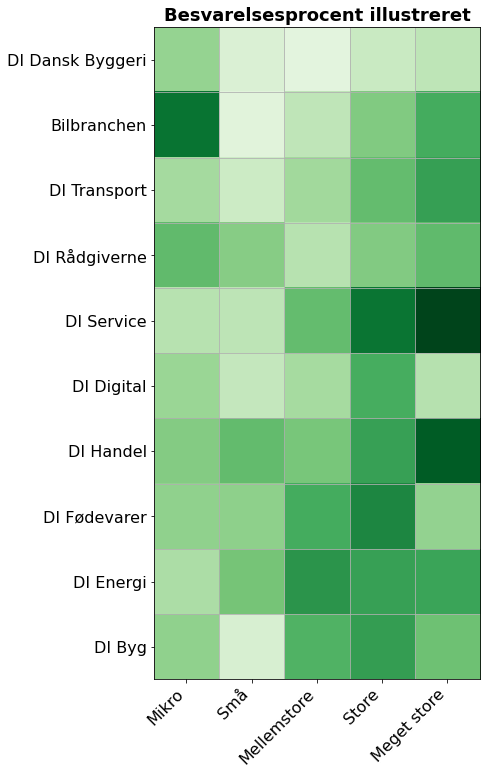

In [330]:
#først sorteres dataframet efter indekset igen
#dette giver en logisk struktur som følge af konstruktionen af datframet
output_df.sort_index(inplace=True)

#5 kategorier af størrelse, 10 forskellige branchefællesskaber
nrows = 10
ncols = 5

list_svarprocent = output_df["Svarprocent"]
list_index = list(output_df.index)

data = np.zeros(nrows*ncols)
data[list_index] = list_svarprocent
data = np.ma.array(data.reshape((nrows, ncols)), mask=data==0)

fig, ax = plt.subplots(figsize=(6, 12))
ax.imshow(data, cmap="Greens", origin="lower", vmin=0)

# grid tilføjes
ax.set_xticks(np.arange(ncols+1)-0.5, minor=True)
ax.set_yticks(np.arange(nrows+1)-0.5, minor=True)
ax.grid(which="minor")
ax.tick_params(which="minor", size=0)

# labels på x-aksen:
x_ticks = [0, 1, 2, 3, 4]
x_labels = ['Mikro', 'Små', 'Mellemstore', 'Store', 'Meget store']
plt.xticks(x_ticks, x_labels, \
           rotation=45, \
           fontsize='16', \
           horizontalalignment='right')

# labels på y-aksen:
y_labels = branche_list
y_ticks = []
for i in range(len(y_labels)):
    y_ticks.append(i)
plt.yticks(y_ticks, y_labels, \
          fontsize='16')

# titel tilføjes
ax.set_title('Besvarelsesprocent illustreret', \
             fontweight='bold', \
             fontsize='18')

plt.show()